# k-Means

## Die Idee hinter k-Means

Die Idee hinter diesem Verfahren ist, dass die zu unterscheidenden Klassen im Raum der gegebenen Parameter _eng zusammenliegen_.  Dies setzt voraus, dass es in diesem Raum eine __Metrik__ gibt, mit der Abstände gemessen werden können. Die vertrauteste Metrik ist die __Euklidische Metrik__

$$ \text{d}(x, y) = \sum_{k=1}^N (x_k - y_k)^2 $$

mit der wir auch im täglichen Leben Abstände messen. Wir denken uns zusammengehörde Werte in einem zusammenhöngenden Bereich zusammengedrängt, mit einem zu bestimmenden Punkt als Mittelpunkt. Diese Bereiche werden __Cluster__ genannt; ein Verfahren, dass solche Cluster bestimmen kann, heißt entsprechend ein __Clusterung-Verfahren__.

Da ansonsten keine Annahmen über die gegebenen Daten getroffen werden, insbesondere also die Daten nicht _gelabelt_ sind, gehört dieses Verfahren zu den _Verfahren ohne Lehrer_, ist also ein __Unsupervised Learning__-Verfahren. Ist die Anzahl der Cluster bekannt, so kann dies in die Berechnung der Cluster eingegeben werden, so dass mit besseren Ergebnissen gerechnet werden kann.

Das Verfahren hängt stark von der zufälligen Auswahl der Startwerte ab, so dass es zu Ergebnissen mit sehr unterschiedlichem Ausgang kommen kann.

## k-Means: Mathematische Formulierung
Ziel von k-Means ist es, einen Datensatz $x_1,\ldots,x_N$ so in $k$ Cluster zu teilen, dass die Summe der quadrierten Abweichungen von den Schwerpunkten  $\mu_i$ minimal ist. Mathematisch entspricht dies der Minimierung der Funktion

$$ L = L(\mu_i,C_i) := \sum_{i=1}^k  \sum_{x_j \in C_i} |x_j - \mu_i|^2 $$

mit den Schwerpunkten $\mu_i$ der Cluster $C_i$. Man beachte, dass $x_j$  und $\mu_i$ Vektoren sind und $|x_j - \mu_i|$ der Euklidische Abstand.

Diese *Verlustfunktion* ist wieder eine Fehlerquadratsumme, allerdings diesmal eine Doppelsumme, da über die Cluster $C_i$ summiert wird und darin jeweils über die quadratischen Abweichungen vom Mittelwert $\mu_j$, also die **Varianzen**. Daher spricht man auch von **Clustering durch Varianzminimierung**. 

Zu einer vorgegebnen Anzahl $k$ von Clustern ist also eine *optimale* Zuordnung der Daten zu den einzelnen Clustern gesucht, so dass die Varianz um die Mittelwerte (*means*) minimal ist.

### Der Lloyd-Algorithmus


Der am häufigsten verwendete k-Means-Algorithmus ist der Lloyd-Algorithmus, der oft als „_der_ k-means-Algorithmus“ bezeichnet wird. Der Algorithmus funktioniert wie folgt:

1. **Initialisierung**: Wähle zufällig $k$ Mittelwerte $m_1,\ldots,,m_k$ aus den Daten
2. **Zuordnung**: Jedes Datenobjekt wird demjenigen Cluster zugeordnet, bei dem die Cluster-Varianz am wenigsten erhöht wird:

$$C_i := \{ x_j :  |x_j-m_i|^2 \leq |x_j-m_l|^2 \;\; \text{für alle}\;\; l = 1,\ldots k  \}$$

3. **Aktualisierung**: Berechne die Mittelpunkte (= Schwerpunkte) der Cluster neu:$$m_i \rightarrow \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j $$
4. **Wiederholung** der Schritte 2 und 3, bis sich die Zuordnungen nicht mehr ändern.

### Der Lloyd-Algorithmus am einfachen Beispiel

Wir nehmen als eindimensionales Beispiel die drei Zahlen 1,3,8 und wollen sie in zwei Cluster einteilen, nämlich $C_1 = \{1,3\}$ und $C_2 = \{8\}$. 

1. **Initialisierung**: Um das Verfahren zu demonstrieren, wählen wir im ersten Schritte die zwei Cluster-Center $m_1 = 1$ und $m_2 = 3$. Dies ist der ungünstigste Fall, ist aber wegen der ansonsten zufälligen Wahl möglich (und eines der Probleme des Algorithmus).

2. **Zuordnung**: Wir erhalten im ersten Durchlauf die Zuordnung $C_1 = \{1\}, C_2 = \{3,8\}$. Das ist nicht das, was wir wollen; 1 und 3  liegen in getrennten Clustern, und 3 und 8 im selben Cluster.

3. **Aktualisierung**: $m_1 \rightarrow 1, m_2 \rightarrow \frac{3 + 8} {2} = 5,5$. Der Mittelpunkt von $C_2$ wird vom Wert 8 "angezogen".

4. **Wiederholung**: Da sich der Wert vom $m_2$ verändert hat, wiederholen wir Schritte 2 und 3.


2. **Zuordnung**: Die neuen Cluster lauten (ohne große Rechnung) $C_1 = \{1,2\}, C_2 = \{8\}$. Die Cluster sind jetzt so wie gedacht.

3. **Aktualisierung**: $m_1 \rightarrow \frac{1 + 3} {2} = 2, m_2 \rightarrow 8$. 

4. **Wiederholung**: Da sich sowohl die Cluster als auch die Mittelpunkte verändert haben, wiederholen wir Schritte 2 und 3.


2. **Zuordnung**: Die Cluster ändern sich nicht.

3. **Aktualisierung**: Die Mittelpunkte ändern sich nicht.

4. **Wiederholung**: Da sowohl die Cluster als auch die Mittelpunkte unverändert sind, endet das Verfahren mit den erwarteten Clustern.


## Implementierung von k-Means mit dem Lloyd-Algorithmus 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def init(xs,k):
    ''' Wähle zufällig k Daten '''
    return np.array(np.random.default_rng().choice(xs,k))

def zuordnung(xs,ms):
    '''Bildung der Cluster aus den Punken, abhängig vom aktuellen Mittelpunkt'''
    cs = [[] for m in ms]

    for x in xs:   
        dist = [euklid(x,m) for m in ms]
        index = dist.index(min(dist))  
        cs[index].append(x)  
     
    return np.array([np.array([x for x in c]) for c in cs],dtype='object')

def aktualisierung(cs):
    '''Berechnet den neuen Cluster-Schwerpunkts'''
    ms = [[] for _ in cs]
    for n,c in enumerate(cs):
        ms[n] = schwerpunkt(c)
    return np.array(ms)

def kmeans(xs,ms):
    '''Der k-Means-Algorithmus; Startwerte ms sind vorgegeben'''
    ms_alt = None
    #while changed(ms,ms_alt):
    for _ in range(200):
        ms_alt = ms
        cs = zuordnung(xs,ms)
        ms = aktualisierung(cs)
    return cs,ms

def schwerpunkt(xs):
    '''Berechnet den Schwerpunkt einer Menge von Vektoren'''
    sum = np.zeros(xs.shape[1])
    for x in xs:
        sum += x
    return sum / len(xs)
    
def euklid(x,y):
    '''Berechnet das Quadrat des Euklidischen Abstands zwischen zwei Punkten.'''
    return np.dot(x-y,x-y) ** 2


def changed(ms,ms_alt):
    if ms_alt is None:
        return True
    for m in ms:
        for ma in ms_alt:
            if np.array_equal(m,ma):
                continue
            return True 
    return False

def print_clusters(cs,ms,elements=False):
    '''Formatierte Ausgabe der Cluster'''
    for n,(c,m) in enumerate(zip(cs,ms)):
        print(f'Cluster {n} ({len(c)} Punkte): Mittelpunkt {m}')
        if elements is True:
            print(f'Punkte: {c}')

## Beispiele

### Unser einfaches Beispiel mit drei Punkten
Wir testen unser Beispiel an der Punktmenge $\{1,3,8\}$.

In [3]:
X = [np.array([1]),np.array([3]),np.array([8])]
 
ms = [X[0],X[1]] 
cs,ms = kmeans(X,ms)

print_clusters(cs,ms,True)

Cluster 0 (2 Punkte): Mittelpunkt [2.]
Punkte: [[1]
 [3]]
Cluster 1 (1 Punkte): Mittelpunkt [8.]
Punkte: [[8]]


### Zufällig erzeugte Daten

In [4]:
import sklearn.datasets as ds
import time

Cluster 0 (19 Punkte): Mittelpunkt [-9.95134069 -3.58042526]
Cluster 1 (20 Punkte): Mittelpunkt [-1.67491651  4.20563482]
Cluster 2 (20 Punkte): Mittelpunkt [-1.44720393  0.83857489]
Cluster 3 (22 Punkte): Mittelpunkt [-7.1057729 -7.8015733]
Cluster 4 (19 Punkte): Mittelpunkt [-6.05148969 -3.0418724 ]


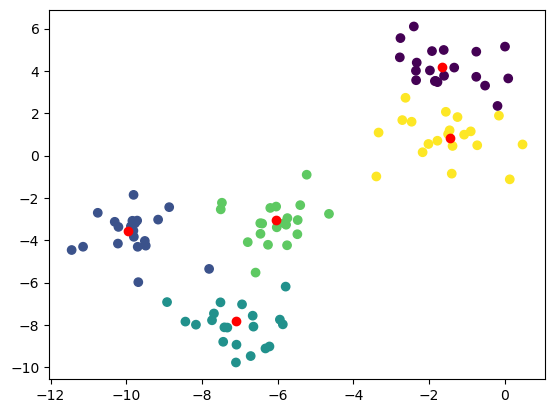

In [5]:
n_centers = 5

X, y = ds.make_blobs(n_samples = 100, n_features = 2, centers = n_centers, random_state = 1)

idx = np.random.choice(list(range(len(X))), n_centers)
ms = X[idx]

%timeit
cs,ms = kmeans(X,ms)

print_clusters(cs,ms,False)

plt.scatter(X[:,0], X[:, 1],c = y)
plt.scatter(ms[:,0], ms[:,1],c = 'red')
pass

## Zur Geschichte
Der Begriff „k-M
eans“ wurde zuerst von MacQueen 1967 verwendet, die Idee geht jedoch auf Hugo Steinhaus 1957 zurück. Der heutzutage meist als „k-means-Algorithmus“ bezeichnete Standard-Algorithmus wurde 1957 von Lloyd vorgeschlagen, aber erst 1982 in einer Informatik-Zeitschrift publiziert. [Quelle: Wikipedia]

## Links
* [K-Means in der Wikipedia](https://de.wikipedia.org/wiki/K-Means-Algorithmus)